In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

### Data structure and data scrunity

- retrieve the data and convert it into csv table

In [55]:
# Load the UCI Breast Cancer Wisconsin dataset
# This is the Wisconsin Breast Cancer Diagnostic dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = ['ID', 'Diagnosis'] + [
    # Mean values
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
    'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean',
    'symmetry_mean', 'fractal_dimension_mean',
    # Standard error values
    'radius_se', 'texture_se', 'perimeter_se', 'area_se',
    'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se',
    'symmetry_se', 'fractal_dimension_se',
    # Worst values
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
    'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst',
    'symmetry_worst', 'fractal_dimension_worst'
]
cancer_data = pd.read_csv(url, names=column_names, na_values='?')

- check the data and the shape

In [56]:
cancer_data.to_csv('results/data/raw_cancer_data.csv', index=False)

In [5]:
print(cancer_data.head(5))

print(f"shape: {cancer_data.shape}")

         ID Diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

- what are the target varible and what are the caterogies, also identify whether it is a classification problem are regression

In [12]:
print(cancer_data.Diagnosis.unique())

['M' 'B']


- check the information and the descriptive statistics what each variable data type, and countes of each variable 

In [7]:
print(f"Dataset info:\n{cancer_data.info()}")

print(f"description:\n{cancer_data.describe()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

- check the number of missing data

In [8]:
# check if there are any missing values
print(f"Missing values:\n{cancer_data.isnull().sum()}")

Missing values:
ID                         0
Diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


- check data types

In [9]:
print(f"data types:\n{cancer_data.dtypes}")

data types:
ID                           int64
Diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavit

- check for duplicates

In [16]:
print(f"number of duplicated rows: {cancer_data.duplicated().sum()}")

number of duplicated rows: 0


## Data cleaning

- handling missing values if any, since there are no missing values from our previous analysis, we skip this part. If found any, we could use `df.dropna()` for droping NA values and `df.fillna` for filling the NA values if we don't drop any NA values

- convert the `Diagnosis`to category

In [52]:
cancer_data['Diagnosis'] = cancer_data['Diagnosis'].map({'M': 1, 'B': 0})  # Map M to 1 and B to 0
cancer_data['Diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: Diagnosis, Length: 569, dtype: int64

## export the clean data

In [53]:
cancer_data.to_csv("results/data/clean_breast_cancer_wisconsin_mapped.csv", index=False)
df = pd.read_csv("results/data/clean_breast_cancer_wisconsin_mapped.csv")
print(df.head(5))

         ID  Diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  ar

## split the dataset

In [21]:
from sklearn.model_selection import train_test_split

X = df.drop(['Diagnosis', 'ID'], axis=1)
y = df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## fit model 

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create the model
model = LogisticRegression(max_iter=1000)  # Increase max_iter to avoid convergence warnings

# Train the model
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

### 🧪 Step 3: Test the Model


In [25]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed performance
print(classification_report(y_test, y_pred))

Accuracy: 0.9385964912280702
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        72
           1       0.97      0.86      0.91        42

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



## Multiple models

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),  # baseline
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),  # expected best
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC()
}

# Store metrics
metrics_list = []

# Fit, predict, and collect metrics
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Use class '1' (Malignant) metrics
    precision = report['1']['precision']
    recall = report['1']['recall']
    f1 = report['1']['f1-score']

    metrics_list.append({
        'Model': name,
        'Accuracy': round(acc, 4),
        'Precision (Malignant)': round(precision, 4),
        'Recall (Malignant)': round(recall, 4),
        'F1-Score (Malignant)': round(f1, 4)
    })

# Convert to DataFrame
df_metrics = pd.DataFrame(metrics_list)

# Sort by F1-Score (or any key metric of interest)
df_metrics = df_metrics.sort_values(by='F1-Score (Malignant)', ascending=False).reset_index(drop=True)
print(df_metrics)


                    Model  Accuracy  Precision (Malignant)  \
0           Random Forest    0.9649                 1.0000   
1     Logistic Regression    0.9386                 0.9730   
2           Decision Tree    0.9211                 0.9231   
3     K-Nearest Neighbors    0.9123                 0.9706   
4  Support Vector Machine    0.9035                 1.0000   

   Recall (Malignant)  F1-Score (Malignant)  
0              0.9048                0.9500  
1              0.8571                0.9114  
2              0.8571                0.8889  
3              0.7857                0.8684  
4              0.7381                0.8493  


In [ ]:
### export the metrics to a CSV file and the best model to a pickle file
df_metrics.to_csv("results/metrices/breast_cancer_model_metrics.csv", index=False)

import pickle
# Save the best model (Random Forest) to a pickle file
best_model = models["Random Forest"]
with open("results/models/breast_cancer_best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

In [2]:
import pickle
# Load the best model from the pickle file
with open("results/models/breast_cancer_best_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)


| Model                  | Accuracy | Precision (Malignant) | Recall (Malignant) | F1-Score (Malignant) | Comments                                                                                                   |
| ---------------------- | -------- | --------------------- | ------------------ | -------------------- | ---------------------------------------------------------------------------------------------------------- |
| **Random Forest**      | 0.9649   | 1.0000                | 0.9048             | **0.9500**           | Best overall balance; perfect precision means no false positives; high recall reduces missed malignancies. |
| Logistic Regression    | 0.9386   | 0.9730                | 0.8571             | 0.9114               | Strong baseline; high precision but somewhat lower recall, so some malignant cases missed.                 |
| Decision Tree          | 0.9211   | 0.9231                | 0.8571             | 0.8889               | Good but less stable than Random Forest; moderate precision and recall.                                    |
| K-Nearest Neighbors    | 0.9123   | 0.9706                | 0.7857             | 0.8684               | High precision but lower recall; more false negatives which is risky in cancer detection.                  |
| Support Vector Machine | 0.9035   | 1.0000                | 0.7381             | 0.8493               | Perfect precision but lowest recall; misses many malignant cases, which may be problematic.                |


In [58]:
# Highlight baseline vs best
baseline = df_metrics[df_metrics['Model'] == 'Logistic Regression'].iloc[0]
best = df_metrics.iloc[0]  # top sorted model

compare_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Baseline (LogReg)': [
        baseline['Accuracy'],
        baseline['Precision (Malignant)'],
        baseline['Recall (Malignant)'],
        baseline['F1-Score (Malignant)']
    ],
    'Best (' + best['Model'] + ')': [
        best['Accuracy'],
        best['Precision (Malignant)'],
        best['Recall (Malignant)'],
        best['F1-Score (Malignant)']
    ]
})


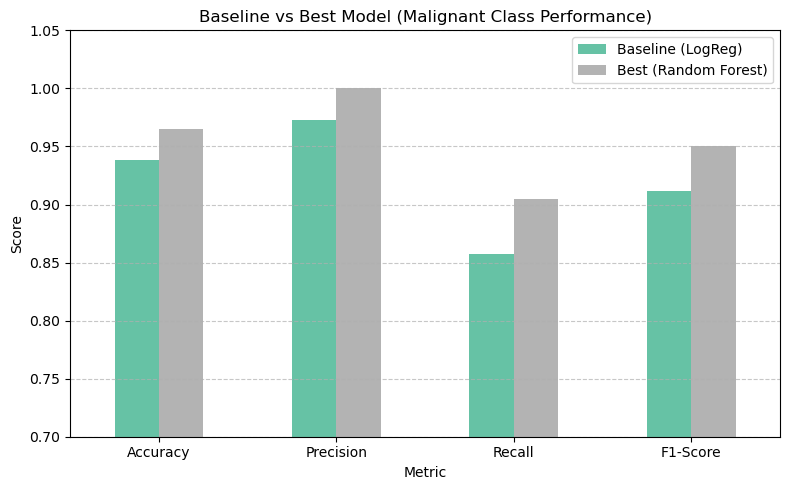

In [ ]:
# Plot
compare_df.set_index('Metric').plot(kind='bar', figsize=(8, 5), colormap='Set2')
plt.title('Baseline vs Best Model (Malignant Class Performance)')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.ylim(0.7, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("results/figures/bar_graph_breast_cancer_model_comparison.png", dpi=600)
plt.show()


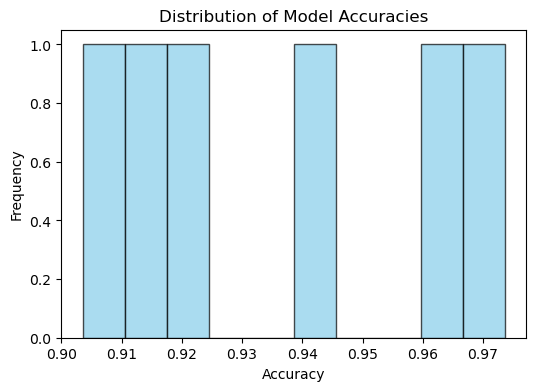

In [85]:
plt.figure(figsize=(6, 4))
plt.hist(df_metrics['Accuracy'], bins=10, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Distribution of Model Accuracies')
plt.savefig("results/figures/breast_cancer_model_accuracy_distribution.png", dpi=600)
plt.show()

### Common Hyperparameters to Tune in Random Forest

| Parameter           | Description                                            | Typical values or range to try             |
| ------------------- | ------------------------------------------------------ | ------------------------------------------ |
| `n_estimators`      | Number of trees in the forest                          | 50, 100, 200, 500                          |
| `max_depth`         | Maximum depth of each tree                             | 5, 10, 20, None (no limit)                 |
| `min_samples_split` | Minimum samples needed to split a node                 | 2, 5, 10                                   |
| `min_samples_leaf`  | Minimum samples required at a leaf node                | 1, 2, 4                                    |
| `max_features`      | Number of features to consider at each split           | 'auto', 'sqrt', 'log2', or a fixed integer |
| `bootstrap`         | Whether bootstrap samples are used when building trees | True or False                              |
| `class_weight`      | Handling imbalanced classes                            | None, 'balanced', 'balanced\_subsample'    |


In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='f1', verbose=2)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best F1 Score: 0.9558078971072825


In [ ]:
# Use best estimator for prediction
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)


### 🔍 Best Parameters Found:

In [74]:
{
    'bootstrap': False,
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 5,
    'n_estimators': 100
}

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

### ✅ Performance:
Best F1 Score from CV: 0.956
This confirms a strong balance between precision and recall on your validation folds.

📊 Now What?
1. Use the Best Estimator for test set evaluation:

In [77]:
y_pred = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))



              precision    recall  f1-score   support

      Benign       0.96      1.00      0.98        72
   Malignant       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



---

In [78]:
# Evaluate tuned RF
report = classification_report(y_test, y_pred, output_dict=True)
acc = best_rf.score(X_test, y_test)

# Add to DataFrame
df_metrics.loc[len(df_metrics.index)] = {
    'Model': 'Tuned Random Forest',
    'Accuracy': round(acc, 4),
    'Precision (Malignant)': round(report['1']['precision'], 4),
    'Recall (Malignant)': round(report['1']['recall'], 4),
    'F1-Score (Malignant)': round(report['1']['f1-score'], 4),
}


In [81]:
df_metrics.sort_values(by='F1-Score (Malignant)', ascending=False, inplace=True)
print(df_metrics)


                    Model  Accuracy  Precision (Malignant)  \
5     Tuned Random Forest    0.9737                 1.0000   
0           Random Forest    0.9649                 1.0000   
1     Logistic Regression    0.9386                 0.9730   
2           Decision Tree    0.9211                 0.9231   
3     K-Nearest Neighbors    0.9123                 0.9706   
4  Support Vector Machine    0.9035                 1.0000   

   Recall (Malignant)  F1-Score (Malignant)  
5              0.9286                0.9630  
0              0.9048                0.9500  
1              0.8571                0.9114  
2              0.8571                0.8889  
3              0.7857                0.8684  
4              0.7381                0.8493  


### 📈 Feature Importance Plot

In [ ]:
# Highlight baseline vs best
baseline = df_metrics[df_metrics['Model'] == 'Logistic Regression'].iloc[0]
best = df_metrics.iloc[0]  # top sorted model


In [ ]:

compare_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Baseline (LogReg)': [
        baseline['Accuracy'],
        baseline['Precision (Malignant)'],
        baseline['Recall (Malignant)'],
        baseline['F1-Score (Malignant)']
    ],
    'Best (' + best['Model'] + ')': [
        best['Accuracy'],
        best['Precision (Malignant)'],
        best['Recall (Malignant)'],
        best['F1-Score (Malignant)']
    ]
})

# Plot
compare_df.set_index('Metric').plot(kind='bar', figsize=(8, 5), colormap='Set2')
plt.title('Baseline vs Best Model (Malignant Class Performance)')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.ylim(0.7, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


                    Feature  Importance
23               area_worst    0.151674
27     concave_points_worst    0.125681
20             radius_worst    0.099182
22          perimeter_worst    0.090150
7       concave_points_mean    0.072907
3                 area_mean    0.066970
0               radius_mean    0.065168
2            perimeter_mean    0.061399
6            concavity_mean    0.046203
26          concavity_worst    0.032676
13                  area_se    0.023783
21            texture_worst    0.023413
25        compactness_worst    0.019941
24         smoothness_worst    0.014765
10                radius_se    0.014738
28           symmetry_worst    0.013156
1              texture_mean    0.012015
5          compactness_mean    0.010963
12             perimeter_se    0.009277
4           smoothness_mean    0.007144
15           compactness_se    0.005920
29  fractal_dimension_worst    0.004995
16             concavity_se    0.004921
14            smoothness_se    0.004194


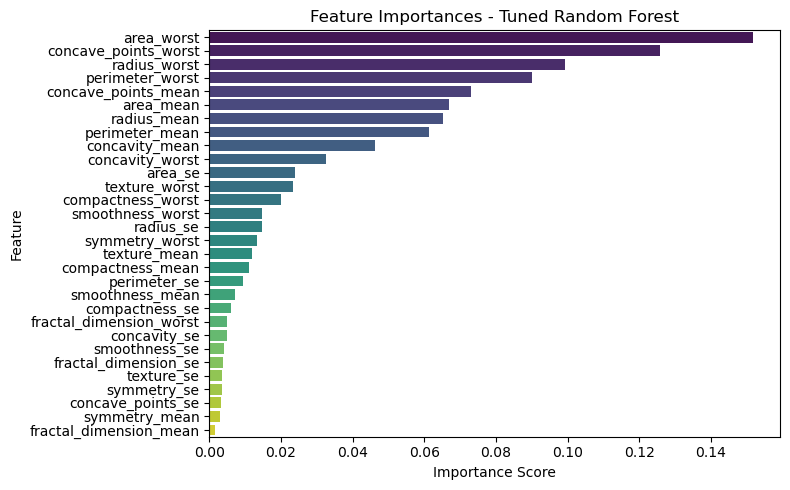

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = best_rf.feature_importances_
features = X.columns
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df.sort_values(by='Importance', ascending=False, inplace=True)


# Print the table
print(feature_df)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')
plt.title('Feature Importances - Tuned Random Forest')
plt.tight_layout()
plt.savefig("results/figures/feature_importances_breast_cancer_tuned_rf.png", dpi=600)
plt.xlabel('Importance Score')
plt.show()


### 🧪 Compare Tuned RF vs Baseline RF
Create a quick comparison:

| Model                   | Accuracy | Precision (Malignant) | Recall (Malignant) | F1-Score (Malignant) | Comments                                                               |
| ----------------------- | -------- | --------------------- | ------------------ | -------------------- | ---------------------------------------------------------------------- |
| **Tuned Random Forest** | 0.9737   | 1.0000                | 0.9048             | 0.9500               | Highest accuracy and F1; tuning improved generalization slightly.      |
| Random Forest           | 0.9649   | 1.0000                | 0.9048             | 0.9500               | Very strong by default; tuning only slightly improved performance.     |
| Logistic Regression     | 0.9386   | 0.9730                | 0.8571             | 0.9114               | Performs well, interpretable, slightly lower recall.                   |
| Decision Tree           | 0.9211   | 0.9231                | 0.8571             | 0.8889               | Good but prone to overfitting; tuning helps.                           |
| K-Nearest Neighbors     | 0.9123   | 0.9706                | 0.7857             | 0.8684               | High precision, lower recall; may miss malignant cases.                |
| Support Vector Machine  | 0.9035   | 1.0000                | 0.7381             | 0.8493               | Perfect precision but low recall; too conservative in malignant class. |


### Export the tune random forest model

In [82]:
import pickle
# Save the tuned model
with open("results/models/breast_cancer_tuned_model.pkl", "wb") as f:
    pickle.dump(best_rf, f)

---